In [31]:
from HH_Laura import HouseholdSpecializationModelClass as HC
from types import SimpleNamespace
import numpy as np  
from scipy import optimize
import ipywidgets as widgets
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import cm

In [32]:
a = HC()
a.solve_discrete()

# a. Defining parameters

    # Define parameters alpha = 0.25 and sigma = 0.5
a.par.alpha = 0.25
a.par.sigma = 0.5  
a_1 = a.solve_discrete()

HF_1 = a_1.HF
HM_1 = a_1.HM

HFHM_1=HF_1/HM_1

    # Define parameters alpha = 0.25 and sigma = 1.0
a.par.alpha = 0.25
a.par.sigma = 1.0  
a_2 = a.solve_discrete()

HF_2 = a_2.HF
HM_2 = a_2.HM

HFHM_2=HF_2/HM_2

    # Define parameters alpha = 0.25 and sigma = 1.5
a.par.alpha = 0.25
a.par.sigma = 1.5  
a_3 = a.solve_discrete()

HF_3 = a_3.HF
HM_3 = a_3.HM

HFHM_3=HF_3/HM_3

    # Define parameters alpha = 0.5 and sigma = 0.5
a.par.alpha = 0.5
a.par.sigma = 0.5
a_4 = a.solve_discrete()

HF_4 = a_4.HF
HM_4 = a_4.HM

HFHM_4=HF_4/HM_4

    # Define parameters alpha = 0.5 and sigma = 1.0
a.par.alpha = 0.5
a.par.sigma = 1.0  
a_5 = a.solve_discrete()

HF_5 = a_5.HF
HM_5 = a_5.HM

HFHM_5=HF_5/HM_5

    # Define parameters alpha = 0.5 and sigma = 1.5
a.par.alpha = 0.5
a.par.sigma = 1.5 
a_6 = a.solve_discrete()

HF_6 = a_6.HF
HM_6 = a_6.HM

HFHM_6=HF_6/HM_6

    # Define parameters alpha = 0.75 and sigma = 0.5
a.par.alpha = 0.75
a.par.sigma = 0.5  
a_7 = a.solve_discrete()

HF_7 = a_7.HF
HM_7 = a_7.HM

HFHM_7=HF_7/HM_7

    # Define parameters alpha = 0.75 and sigma = 1.0
a.par.alpha = 0.75
a.par.sigma = 1.0  
a_8 = a.solve_discrete()

HF_8 = a_8.HF
HM_8 = a_8.HM

HFHM_8=HF_8/HM_8

    # Define parameters alpha = 0.75 and sigma = 1.5
a.par.alpha = 0.75
a.par.sigma = 1.5  
a_9 = a.solve_discrete()

HF_9 = a_9.HF
HM_9 = a_9.HM

HFHM_9=HF_9/HM_9

In [33]:
print(HFHM_1)

0.5454545454545454


In [34]:
print(HFHM_1)
print(HFHM_2)
print(HFHM_3)
print(HFHM_4)
print(HFHM_5)
print(HFHM_6)
print(HFHM_7)
print(HFHM_8)
print(HFHM_9)

0.5454545454545454
0.3076923076923077
0.21428571428571427
1.0
1.0
1.0
1.8333333333333333
3.25
4.666666666666667


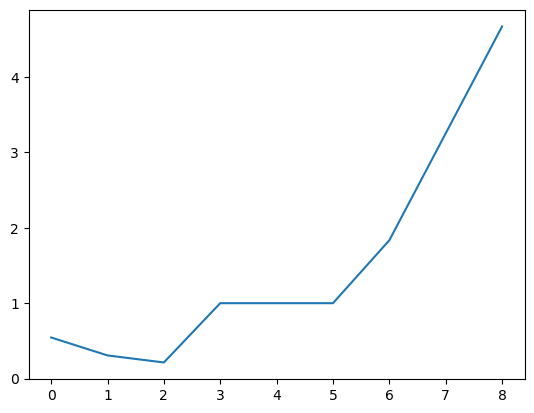

In [35]:
#define numpy array
x = np.array([HFHM_1, HFHM_2, HFHM_3, HFHM_4, HFHM_5, HFHM_6, HFHM_7, HFHM_8, HFHM_9]) 

plt.plot(x)

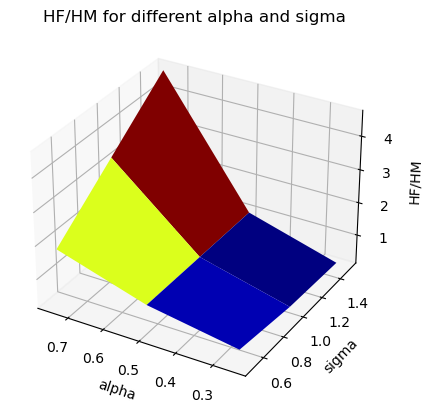

In [36]:
HFHM = np.array([HFHM_1, HFHM_2, HFHM_3, HFHM_4, HFHM_5, HFHM_6, HFHM_7, HFHM_8, HFHM_9]).reshape(3,3)
alpha = np.array([0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75]).reshape(3,3)
sigma = np.array([0.5, 1, 1.5, 0.5, 1, 1.5, 0.5, 1, 1.5]).reshape(3,3)

# a. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(alpha,sigma,HFHM,cmap=cm.jet)

# b. add labels
ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_zlabel('HF/HM')

# c. invert xaxis
ax.invert_xaxis()

# d. add title
ax.set_title('HF/HM for different alpha and sigma')

plt.show()

### 2. Plot log HF/HM against log WF/WM for WF(0.8, 0.9, 1.0, 1.1, 1.2)

In [ ]:
x = np.array([HFHM_1, HFHM_2, HFHM_3, HFHM_4, HFHM_5, HFHM_6, HFHM_7, HFHM_8, HFHM_9]) 

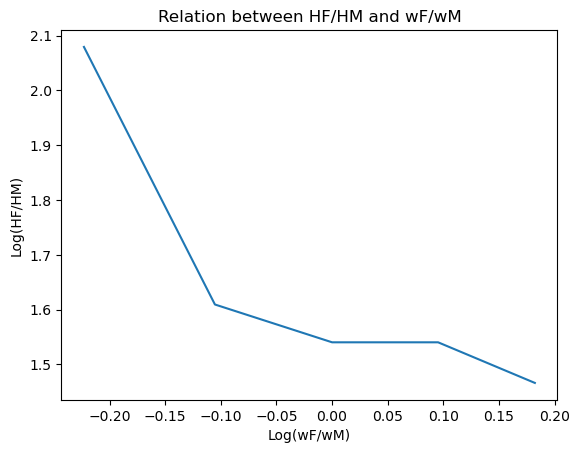

In [55]:
a.par.wF = a.par.wF_vec
#np.linspace(0.8, 0.9, 1.0, 1.1, 1.2)

# Values of wF
wF_values = np.linspace(0.8, 1.2, 5)

# Function to calculate HF/HM for a certain value of wF
def calc_HF_HM(wF):
    a.par.wF = wF

    # Solve model 
    opt = a.solve_discrete()

    # Return HF/HM
    return opt.HF / opt.HM

# Calculate result for diferent values of wF
HF_HM_values = [calc_HF_HM(wF) for wF in wF_values]

# Plot results
fig, ax = plt.subplots()
ax.plot(np.log(wF_values/ a.par.wM), np.log(HF_HM_values))
ax.set_xlabel('Log(wF/wM)')
ax.set_ylabel('Log(HF/HM)')
ax.set_title('Relation between HF/HM and wF/wM')
plt.show()
